
# Trabajo de reducción de dimensión con componentes principales
## Introducción
En este trabajo, calcularemos los componentes principales asociados a un conjunto de fotos de caras, (provienen del sitio web ["Labeled Faces in the Wild"](http://vis-www.cs.umass.edu/lfw/), un conjunto de datos diseñados para testear algoritmos de reconocimientos de caras. 

Empezamos por cargar los módulos que solemos necesitar

In [3]:
# Completar aquí
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# --------------------




## Cargamos los datos.
El fichero que contiene los datos es faces.csv que se puede descargar del Aula Virtual y guardar en la carpeta data.
Contiene 5000 filas y 1024 columnas. Cada fila corresponde a una imagen de 32 x 32 pixeles. Cada columna corresponde a la intensidad de gris de un pixel.

Los datos están disponibles en `scikit-learn` usando la función `fetch_lfw_people`. Siguiendo el ejemplo en https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py, 

In [2]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)


Hemos especificado que queremos sólo las imágenes de personas para las que hay como mínimo 70 datos (imágenes), y hemos realizado un cambio de tamaño de cada imagen. El objeto `lfw_people` tiene varios atributos interesantes: 
- `data` que es un `np.ndarray` que contiene una fila por imagen, 
- `images` que es un `np.ndarray` con tres dimensiones: la primera corresponde al número de la imagen, la segunda y tercera a la altura y anchura de cada imagen.
- `target` son las etiquetas (números enteros) de personas
- `target_names` son los nombres de las personas correspondiente a cada etiqueta.

Crear los arrays `X` que contenga las características, `y` que contenga las etiquetas, así como `imagenes` que contenga el array de imágenes.

Cuántos datos contiene el conjunto, de cuántos píxeles es cada imagen, cuántas personas están representadas, quienes son y con qué frecuencia aparecen en el conjunto cada uno de ellos?

In [63]:
# Completar aquí
datos, h, w = lfw_people.images.shape

X = lfw_people.data
y = lfw_people.target

nombres = lfw_people.target_names
pers = nombres.shape[0]

print(f'El conjunto contiene {datos} datos, para cada imagen, la altura es {h} píxeles y el ancho es de {w} píxeles')
count = np.unique(lfw_people['target'], return_counts= True)
print(f'En total son {pers} personas, y cada una aparece con las siguientes frecuencias')
y_serie = pd.Series(y)
print(y_serie.value_counts())
# --------------------
print(f'Ordenadas de 0 a 6, son las siguientes personas: ')
print(lfw_people.target_names.tolist())

El conjunto contiene 1288 datos, para cada imagen, la altura es 50 píxeles y el ancho es de 37 píxeles
En total son 7 personas, y cada una aparece con las siguientes frecuencias
3    530
1    236
6    144
2    121
4    109
0     77
5     71
dtype: int64
Ordenadas de 0 a 6, son las siguientes personas: 
['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair']
[[254.       254.       251.66667  ...  87.333336  88.666664  86.666664]
 [ 39.666668  50.333332  47.       ... 117.666664 115.       133.66667 ]
 [ 89.333336 104.       126.       ... 175.33333  183.33333  183.      ]
 ...
 [ 86.        80.333336  74.666664 ...  44.        49.666668  44.666668]
 [ 50.333332  65.666664  88.       ... 197.       179.33333  166.33333 ]
 [ 30.        27.        32.666668 ...  35.        35.333332  61.      ]]


Vamos a representar la primera imagen, por ejemplo, usando el mismo código que usamos para representar los dígitos en la práctica anterior, pero ahora usamos el colormap "gray".

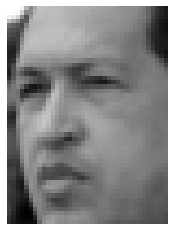

In [74]:
# Completar aquí
from matplotlib import cm
fig, ax = plt.subplots()
imagen = X[0,:].reshape(50, 37)
ax.imshow(
    imagen,
    cmap=cm.gray,
    interpolation='nearest'
)
ax.axis('off');

# --------------------


Y ahora, representamos 100 al azar, (he usado aquí la semilla 314)

In [75]:
# Completar aquí
# Nada que completar
from numpy.random import default_rng
rng = default_rng(314)
fig, axes= plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    #X[y==str(i)].index
    indexes = rng.choice(np.where(y==int(i)), size=10)
    for j in range(10):
        imagen = X[indexes[j],:].reshape(50, 37)
        axes[i, j].imshow(
            imagen,
            cmap=cm.gray,
            interpolation='nearest'
        )
        axes[i , j].axis('off');


ValueError: cannot reshape array of size 142450 into shape (50,37)

## Reducción de la dimensión con componentes principales.

En el conjunto inicial tenemos 1024 variables, vamos a explorar la reducción de dimensión usando componentes principales.

### Obtención de los componentes principales.
Podemos usar la clase `PCA` del submódulo `decomposition`. Admite el parámetro `n_components` que indica con cuántos componentes nos queremos quedar. Si no especificamos nada, calcula todos los componentes. Se trata de un transformador, después de instanciarlo en un objeto llamado `acp`, usando todos los componentes, y ajustarlo calculad las coordenadas de cada imagen en cada componente principal usando `transform`. 


In [168]:
# Completar aquí
from sklearn.decomposition import PCA
acp = PCA()
acp.fit(X)
Z = acp.transform(X)
# --------------------


(1288, 1288)

Cuál es la dimensión de `Z`? Podemos obtener las varianzas de cada componente con el atributo `explained_variance_` de `acp`. Cuáles son los tres primeros auto-valores de la matriz de covarianza de `X`?

In [169]:
# Completar aquí
a = acp.explained_variance_[0:3]
# --------------------
print(f'La dimensión de Z es {Z.shape}')
print(f'Los tres primeros autovalores de la matriz de covarianzas X son: {a}')

La dimensión de Z es (1288, 1288)
Los tres primeros autovalores de la matriz de covarianzas X son: [487947.5  390398.66 188346.05]


Usando el atributo `explained_variance_ratio_`, obtenemos la proporción de varianza explicada por cada componente. Realizad la gráfica de la proporción de varianza explicada acumulada.

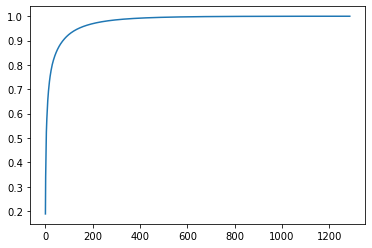

In [142]:
# Completar aquí
varexp = acp.explained_variance_ratio_.cumsum()
plt.plot(varexp);
# --------------------

Qué proporción de varianza explicada se alcanza con 150 componentes?

In [154]:
# Completar aquí

# --------------------
print(f'Si nos quedamos con 150 componentes, la proporción de varianza explicada es {varexp[150]}')

Si nos quedamos con 150 componentes, la proporción de varianza explicada es 0.9541223049163818


## Reducción a 150 componentes.
Visto la evolución de la proporción de varianza explicada, vamos a quedarnos con 150 componentes. Para ello, podemos especificar en el momento de instanciar `PCA` el parámetro `n_components`. Repetir el análisis específicando directamente 150 componentes, creando la matriz `Z` de puntuaciones de cada imagen en los 150 componentes.

In [170]:
# Completar aquí
pca = PCA(n_components= 150)
pca.fit(X)
Z = pca.transform(X)
# --------------------

Podemos obtener los coeficientes que definen cada componente usando el atributo `components_`. Almacena los componentes de manera horizontal, el primer componente, por ejemplo, es la primera fila de `components_`.

In [171]:
acp.components_

array([[-0.00681692, -0.00736358, -0.00855021, ..., -0.01404514,
        -0.01195607, -0.00964084],
       [ 0.02166537,  0.02048159,  0.02229041, ..., -0.0429178 ,
        -0.0412605 , -0.03962969],
       [-0.02165646, -0.01930323, -0.01778281, ..., -0.05017759,
        -0.04404139, -0.03936828],
       ...,
       [ 0.02568372,  0.01105561,  0.02691121, ...,  0.03143518,
         0.02684401,  0.04837979],
       [-0.00320035, -0.01134459, -0.00050922, ..., -0.01022235,
         0.00093501,  0.04530986],
       [ 0.02325717, -0.00906505, -0.03608285, ...,  0.0205972 ,
         0.02351021, -0.01708844]], dtype=float32)

Cúal es el pixel que tiene mayor peso (en valor absoluto) en el primer componente? y en el segundo? 

In [172]:
# Completar aquí
np.where(abs(pca.components_) == np.min(abs(pca.components_)))

(array([56], dtype=int64), array([1697], dtype=int64))

Podemos representar los pesos de cada pixel en el primer componente en forma de una imagen, donde la intensidad de gris es proporcional al peso de este pixel en PC1.

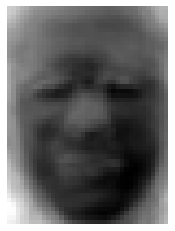

In [173]:
# Completar aquí
fig, ax = plt.subplots()
imagen = pca.components_[0,:].reshape(50, 37)
ax.imshow(
    imagen,
    cmap=cm.gray,
    interpolation='nearest'
)
ax.axis('off');
# --------------------


Representad estos pesos para las seis primeras componentes

In [14]:
# Completar aquí



Representad las 5 imágenes del conjunto que más puntúan en el primer componente y las cinco que menos puntúan en este componente. Consejo: podéis usar `argsort` de `numpy`.

In [15]:
# Completar aquí

# --------------------


Realizad la misma representación para el segundo componente:

In [16]:
# Completar aquí

# --------------------


## Reconstrucción de las imágenes después de la reducción de dimensión

`Z` es la matriz de coordenadas de cada imagen en las 150 primeras componentes principales. Si aplicamos al transformador `acp` el método `inverse_transform` pasándole como argumento `Z`, lo que hacemos es completar 0 todos los componentes que faltan y deshacer el cambio de sistema de coordenadas, de manera que volvemos a situarnos en el sistema de intensidad de grises de los píxeles. 


In [176]:
# Completar aquí
X_res = pca.inverse_transform(Z)
# --------------------


Repetid la representación si sólo nos quedamos con 20 componentes

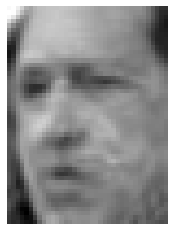

In [184]:
# Completar aquí
fig, ax = plt.subplots()
imagen = X_res[0,:].reshape(50, 37)
ax.imshow(
    imagen,
    cmap=cm.gray,
    interpolation='nearest'
)
ax.axis('off');
# --------------------


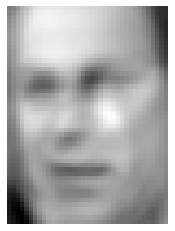

In [185]:
pca = PCA(n_components= 20)
pca.fit(X)
Z = pca.transform(X)
X_res = pca.inverse_transform(Z)

fig, ax = plt.subplots()
imagen = X_res[0,:].reshape(50, 37)
ax.imshow(
    imagen,
    cmap=cm.gray,
    interpolation='nearest'
)
ax.axis('off');